## M1 - Model prediksi titik panas di Sumatera Selatan 2001 - 2023

In [1]:
# load all functions
from C01_data_collection import *
from C02_visualization import *
from C03_preprocessing import *
from C04_model_predictions import *
# from C05_model_evaluate import *

- config models

In [2]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Akuisisi Data

In [3]:
# load dataset
dataset = data_hotspot("dataset_enso.csv")
print(dataset.tail())

      acq_date  hotspot  sst_anom  oni_anom  soi_anom
271 2023-08-31      186      1.30      1.32      -1.4
272 2023-09-30     2247      1.53      1.56      -2.1
273 2023-10-31     3200      1.59      1.78      -0.8
274 2023-11-30      390      1.90      1.92      -1.3
275 2023-12-31       42      1.99      1.97      -0.4


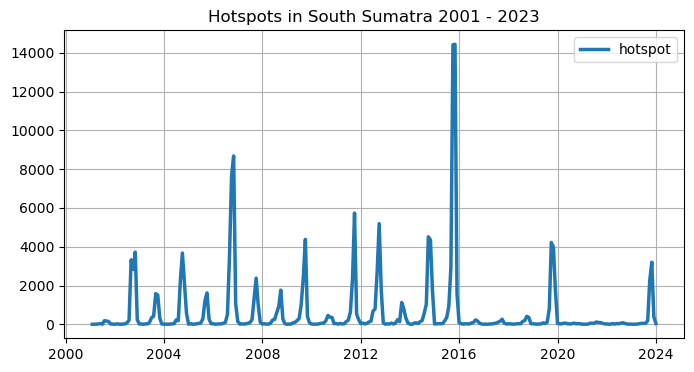

In [4]:
# hasil load dataset
lineplot1(x=dataset["acq_date"], y=dataset["hotspot"], label="hotspot", title="Hotspots in South Sumatra 2001 - 2023")

### 2. Praproses Data

In [5]:
# proses normalisasi min-max
scaler, scaled = normalized(dataset, ["hotspot"])

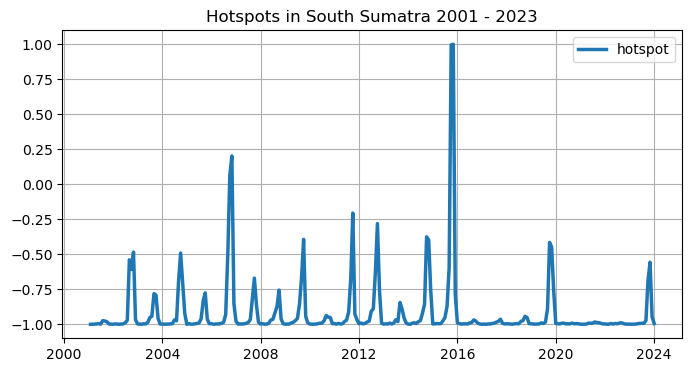

In [6]:
# hasil normalisasi min-max
lineplot1(x=dataset["acq_date"], y=scaled, label="hotspot", title="Hotspots in South Sumatra 2001 - 2023")

### 3. Pembagian Data

In [7]:
# proses pembagian data
train_data, test_data = splitting(scaled)
print(train_data.shape, test_data.shape)

(216, 1) (60, 1)


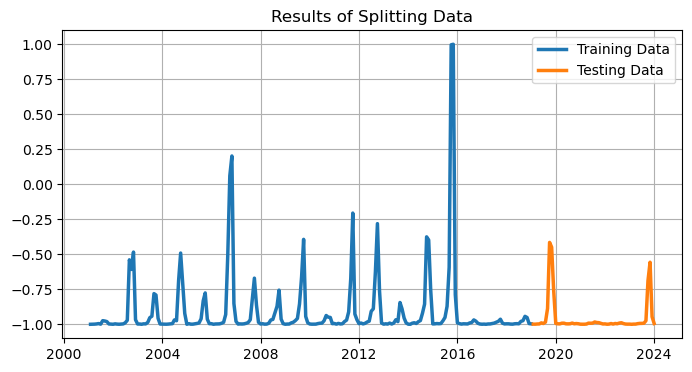

In [8]:
# hasil pembagian data
lineplot2(
  x1=dataset["acq_date"].iloc[:len(train_data)], y1= train_data, label1="Training Data",
  x2=dataset["acq_date"].iloc[len(train_data):], y2=test_data, label2="Testing Data",
  title="Results of Splitting Data"
)

### 4. Supervised Learning

In [9]:
# hasil supervised learning
x_train, y_train, x_test, y_test = results_univariate_supervised(train_data, test_data)

In [10]:
# cek dimensi data
print(x_train.shape, y_train.shape)

(215, 1, 1) (215,)


In [11]:
# cek dimensi data
print(x_test.shape, y_test.shape)

(59, 1, 1) (59,)


### 5.1 Modeling SBi-LSTM

- SBi-LSTM

In [12]:
# call models LSTM
# param : algorithm, timestep, activation, optimizer, dropout
lstm_model = get_models(
  algorithm="SBi-LSTM", timestep=x_train, activation="selu", optimizer="sgd", dropout=0.25
)

In [13]:
# compile models
# param : model, batch_size, epochs, x_train, y_train, x_test, y_test
lstm_history, lstm_predictions = get_prediction(
  model=lstm_model, batch_size=8, epochs=1500, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)

Epoch 1/1500
27/27 [==============================] - 7s 40ms/step - loss: 0.6960 - val_loss: 0.4835
Epoch 2/1500
27/27 [==============================] - 0s 6ms/step - loss: 0.3020 - val_loss: 0.0962
Epoch 3/1500
27/27 [==============================] - 0s 5ms/step - loss: 0.1082 - val_loss: 0.0376
Epoch 4/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1092 - val_loss: 0.0451
Epoch 5/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1039 - val_loss: 0.0437
Epoch 6/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1045 - val_loss: 0.0408
Epoch 7/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1045 - val_loss: 0.0386
Epoch 8/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1029 - val_loss: 0.0386
Epoch 9/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1005 - val_loss: 0.0394
Epoch 10/1500
27/27 [==============================] - 0s 4ms/step - loss: 0.1031 - val_loss: 0.037

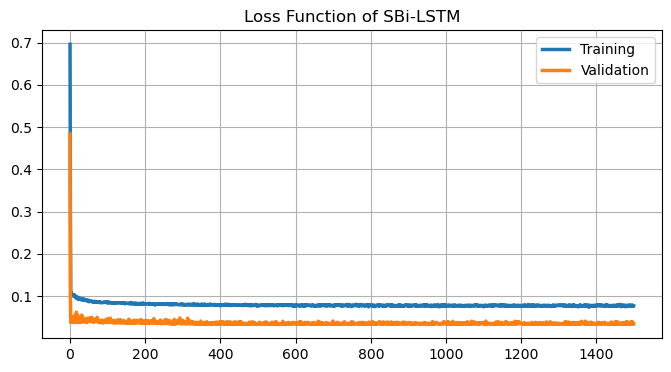

In [14]:
# show loss function
lineplot2(
  x1=lstm_history.epoch, y1=lstm_history.history['loss'], label1="Training",
  x2=lstm_history.epoch, y2=lstm_history.history['val_loss'], label2="Validation",
  title="Loss Function of SBi-LSTM"
)

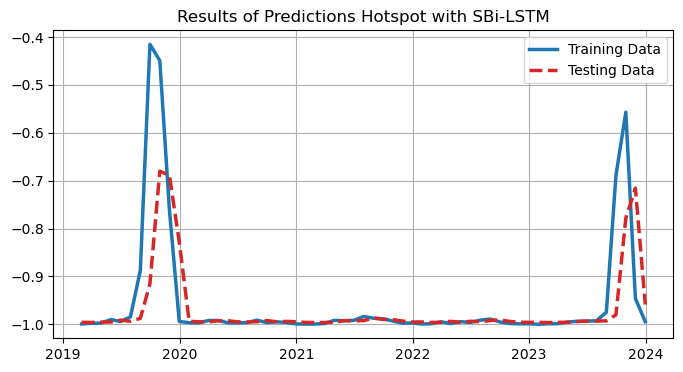

In [15]:
# show result predictions
lineplot3(
  x1=dataset["acq_date"].iloc[len(train_data)+1:], y1= y_test, label1="Training Data",
  x2=dataset["acq_date"].iloc[len(train_data)+1:], y2=lstm_predictions, label2="Testing Data",
  title="Results of Predictions Hotspot with SBi-LSTM"
)